In [6]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_siam import FCSiam
from notebooks.daudt.net_trainer import get_img_trio

In [2]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

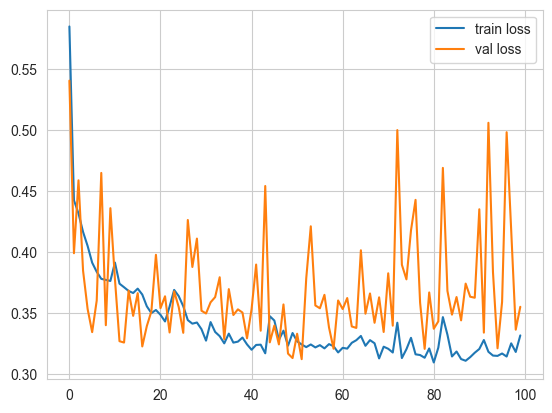

In [3]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [4]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.934841,0.060006,0.752670,0.921356,0.953644,0.976486,0.998154
change accuracy,33.0,0.527137,0.333511,0.000000,0.250804,0.514399,0.808952,0.982265
no change accuracy,33.0,0.941319,0.070812,0.742550,0.927982,0.961270,0.991032,0.999038
precision,33.0,0.367602,0.212847,0.000000,0.185770,0.351932,0.534422,0.690926
recall,33.0,0.489076,0.333244,0.000000,0.246388,0.471140,0.772174,0.972442
dice,32.0,0.387434,0.239842,0.013624,0.200712,0.352725,0.568729,0.793658
kappa,33.0,0.346275,0.236921,-0.000388,0.174047,0.295762,0.553185,0.757449


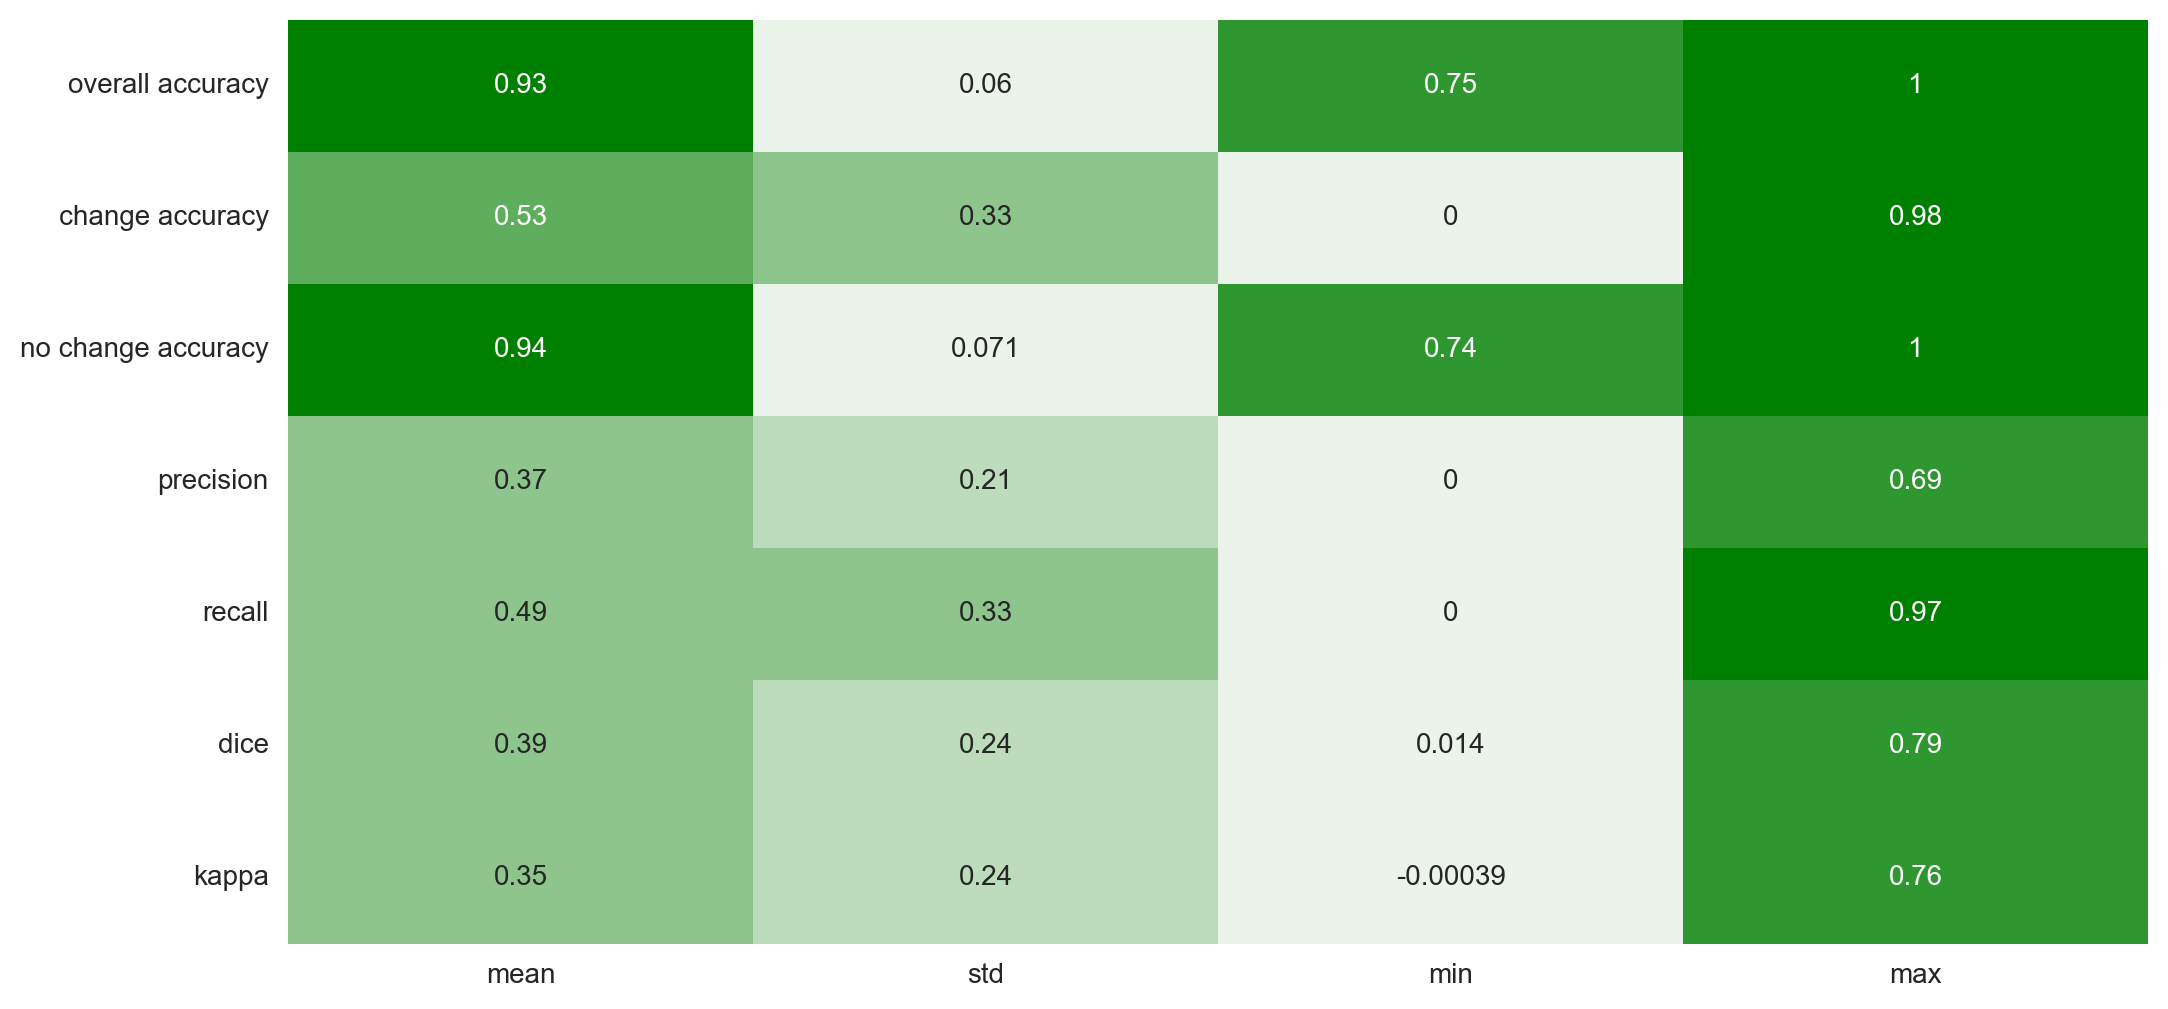

In [5]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [7]:
model = FCSiam(3, 2, False)
state = torch.load(f"./last-checkpoint.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

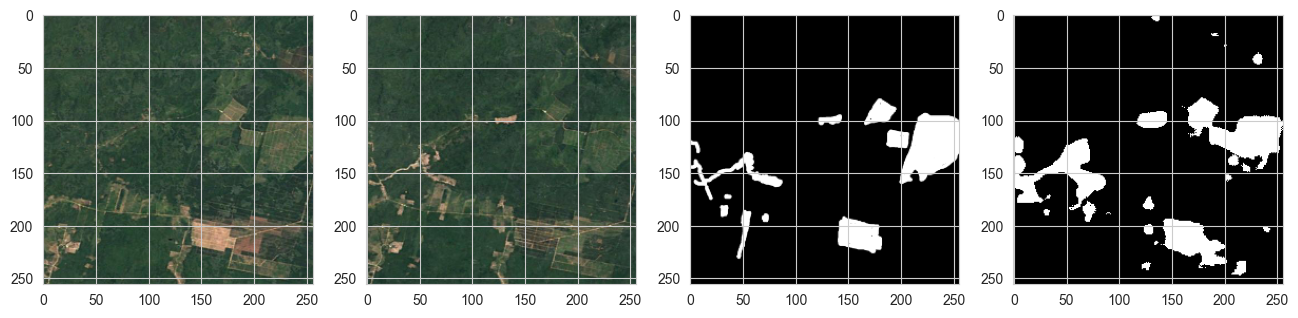

In [21]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    logits = model(img1.unsqueeze(0).to('cuda'),
                   img2.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')